# Heart Disease Prediction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pyGRNN import GRNN
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.tree import plot_tree

#### Heart Disease

data link: https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression

In [2]:
# load dataset
df = pd.read_csv("framingham.csv")

In [3]:
# show fisrt couple rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Processing

In [4]:
# data dimension
df.shape

(4238, 16)

In [5]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# check missing values by column
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### Data Processing

In [7]:
# replace missing in education columns with "Unknown"
df.education = df.education.fillna(0.0)

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

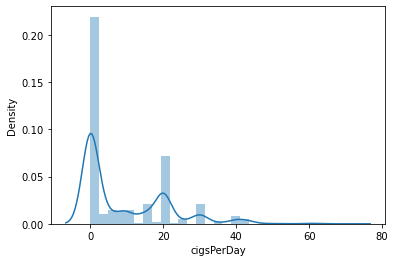

In [8]:
# density plot for cigsPerDay
sns.distplot(df[df['cigsPerDay'].notnull()]['cigsPerDay'])

In [9]:
# replace missing in cigsPerDay with median value of column
df['cigsPerDay'].fillna((df['cigsPerDay'].median()), inplace=True)

<AxesSubplot:xlabel='BPMeds', ylabel='Density'>

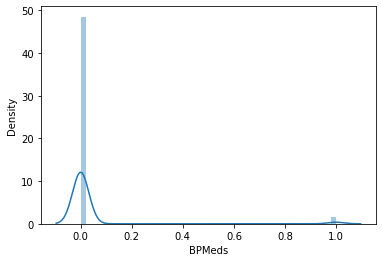

In [10]:
# density plot for BPMeds
sns.distplot(df[df['BPMeds'].notnull()]['BPMeds'])

In [11]:
# replace missing values in BPMeds with most frequent value, which is 0
df['BPMeds'].fillna((df['BPMeds']== 0), inplace=True)

<AxesSubplot:xlabel='totChol', ylabel='Density'>

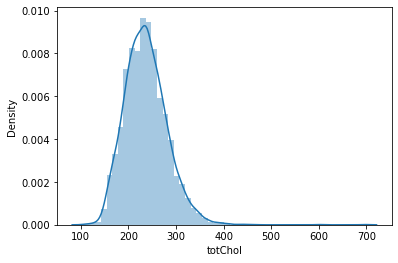

In [12]:
# density plot for totChol
sns.distplot(df[df['totChol'].notnull()]['totChol'])

In [13]:
# replace missing values in totChol with mean
df['totChol'].fillna((df['totChol'].mean()), inplace=True)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

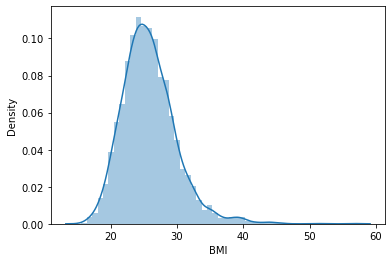

In [14]:
# density plot for BMI
sns.distplot(df[df['BMI'].notnull()]['BMI'])

In [15]:
# replace missing values in BMI with mean
df['BMI'].fillna((df['BMI'].mean()), inplace=True)

<AxesSubplot:xlabel='heartRate', ylabel='Density'>

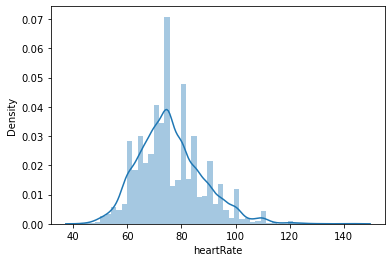

In [16]:
# density plot for heart rate
sns.distplot(df[df['heartRate'].notnull()]['heartRate'])

In [17]:
# replace missing values in heartRate with mean
df['heartRate'].fillna((df['heartRate'].mean()), inplace=True)

<AxesSubplot:xlabel='glucose', ylabel='Density'>

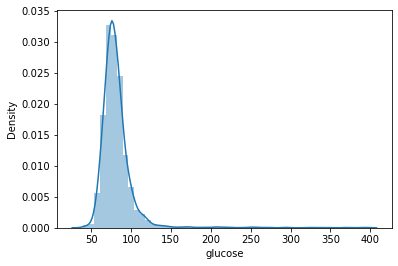

In [18]:
# density plot for glucose 
sns.distplot(df[df['glucose'].notnull()]['glucose'])

In [19]:
# replace missing values in glucose  with mean
df['glucose'].fillna((df['glucose'].mean()), inplace=True)

In [20]:
# check missing values again in dataset 
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# EDA

### Analysis of people who have potential to develop heart disease

In [21]:
# Percentage of heart disease people by gender 
sub1 = 100 * df.groupby(["male"])['TenYearCHD'].sum()/df.male.value_counts()
# create a sub data frame
sub1 = {'female': sub1[0], 'male': sub1[1]}
sub1 = pd.DataFrame(data=sub1, index = [0])

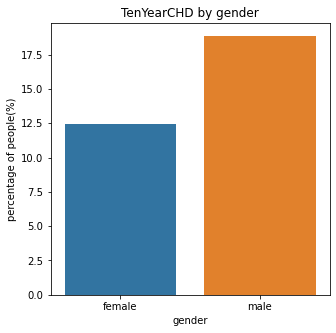

In [22]:
# plot heart disease by gender
plt.figure(figsize=(5,5))
sns.barplot(data=sub1).set(xlabel='gender', ylabel='percentage of people(%)', title = "TenYearCHD by gender")
plt.show()

#### Males have higher potential to develop 10 year risk of coronary heart disease CHD.

In [23]:
# Percentage of people who have potential to develop heart disease based on currentSmoker 
sub2= 100 * df.groupby(["currentSmoker"])['TenYearCHD'].sum()/df.currentSmoker.value_counts()
# create a sub data frame
sub2 = {'No': sub2[0], 'Yes': sub2[1]}
sub2 = pd.DataFrame(data=sub2, index = [0])

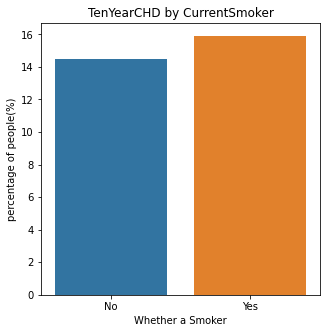

In [24]:
# plot heart disease by gender
plt.figure(figsize=(5,5))
sns.barplot(data=sub2).set(xlabel='Whether a Smoker', ylabel='percentage of people(%)', title = "TenYearCHD by CurrentSmoker")
plt.show()

#### Smokers have higher chance to develop 10 year risk of coronary heart disease CHD.

In [25]:
# Percentage of people who have potential to develop heart disease based on BPMeds
sub3 = 100 * df.groupby(["BPMeds"])['TenYearCHD'].sum()/df.BPMeds.value_counts()
# create a sub data frame
sub3 = {'No': sub3[0], 'Yes': sub3[1]}
sub3 = pd.DataFrame(data=sub3, index = [0])

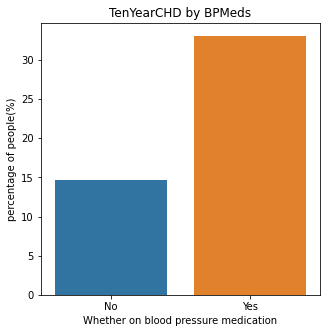

In [26]:
# plot heart disease by BPMeds
plt.figure(figsize=(5,5))
sns.barplot(data=sub3).set(xlabel='Whether on blood pressure medication', ylabel='percentage of people(%)', title = "TenYearCHD by BPMeds")
plt.show()

#### People who are on blood pressure medication are more likely to have 10 year risk of coronary heart disease CHD.

In [27]:
# Percentage of people who have potential to develop heart disease based on prevalentStroke
sub4 = 100 * df.groupby(["prevalentStroke"])['TenYearCHD'].sum()/df.prevalentStroke.value_counts()
# create a sub data frame
sub4 = {'No': sub4[0], 'Yes': sub4[1]}
sub4 = pd.DataFrame(data=sub4, index = [0])

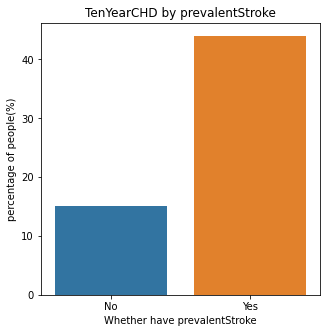

In [28]:
# plot heart disease by prevalentStroke
plt.figure(figsize=(5,5))
sns.barplot(data=sub4).set(xlabel='Whether have prevalentStroke', ylabel='percentage of people(%)', title = "TenYearCHD by prevalentStroke")
plt.show()

#### People who have prevalentStroke are more likely to have 10 year risk of coronary heart disease CHD.

In [29]:
# Percentage of people who have potential to develop heart disease based on prevalentHyp
sub5 = 100 * df.groupby(["prevalentHyp"])['TenYearCHD'].sum()/df.prevalentHyp.value_counts()
# create a sub data frame
sub5 = {'No': sub5[0], 'Yes': sub5[1]}
sub5 = pd.DataFrame(data=sub5, index = [0])

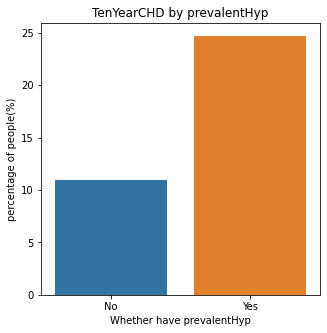

In [30]:
# plot heart disease by prevalentHyp
plt.figure(figsize=(5,5))
sns.barplot(data=sub5).set(xlabel='Whether have prevalentHyp', ylabel='percentage of people(%)', title = "TenYearCHD by prevalentHyp")
plt.show()

#### People who have prevalentHyp are more likely to have 10 year risk of coronary heart disease CHD

In [31]:
# Percentage of people who have potential to develop heart disease based on diabetes
sub6 = 100 * df.groupby(["diabetes"])['TenYearCHD'].sum()/df.diabetes.value_counts()
# create a sub data frame
sub6 = {'No': sub6[0], 'Yes': sub6[1]}
sub6 = pd.DataFrame(data=sub6, index = [0])

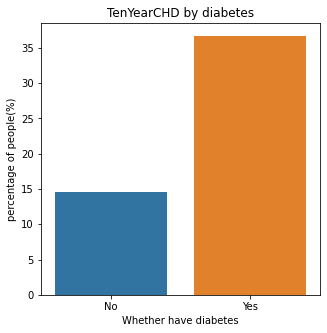

In [32]:
# plot heart disease by prevalentHyp
plt.figure(figsize=(5,5))
sns.barplot(data=sub6).set(xlabel='Whether have diabetes', ylabel='percentage of people(%)', title = "TenYearCHD by diabetes")
plt.show()

#### People who have diabetes are more likely to have 10 year risk of coronary heart disease CHD

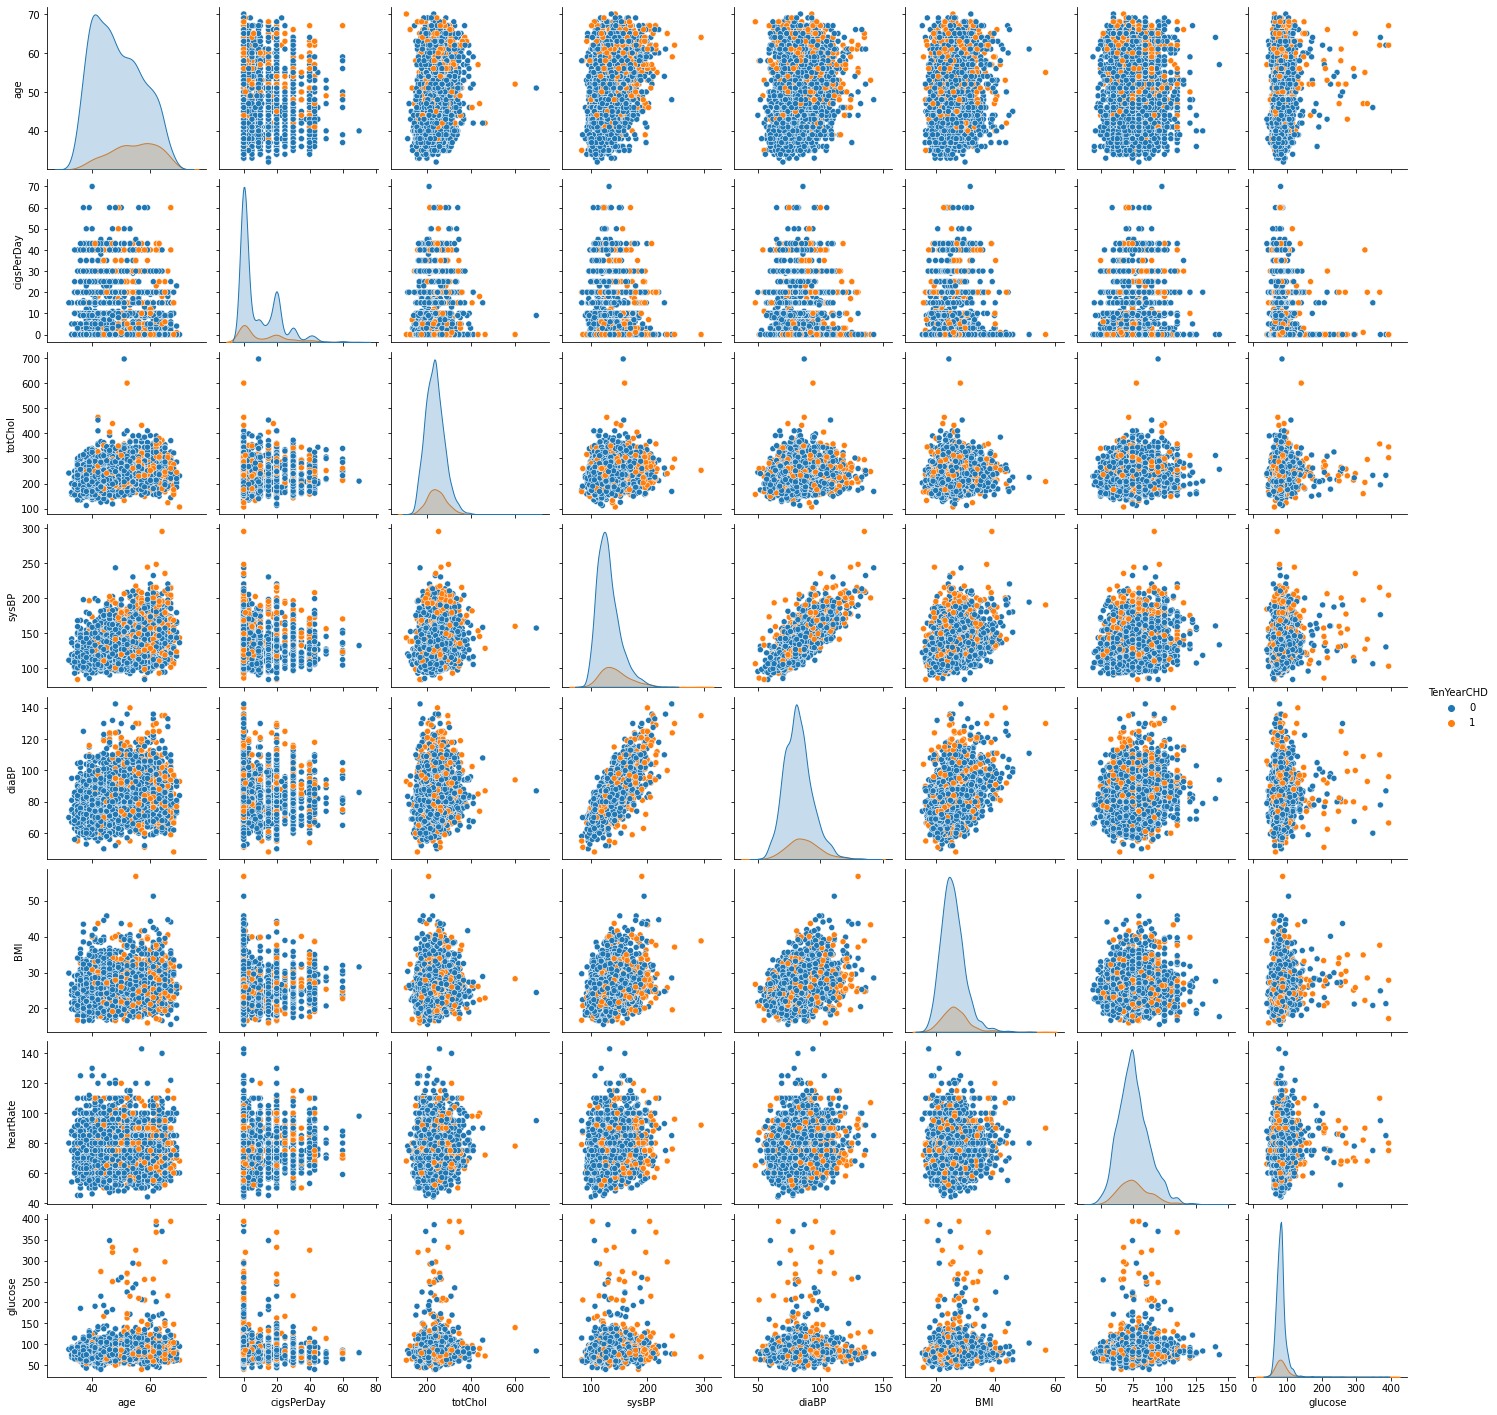

In [33]:
# Extract numeric columns and TenYearCHD 
df_numeric = df[["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "TenYearCHD"]]
# scatterplot matrix for numeric variables 
sns.pairplot(df_numeric, hue = "TenYearCHD")

### Compute Correlation Matrix

In [34]:
# correlation matrix for checking collinearity
corrMatrix = df.corr()
corrMatrix

,male,age,education,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.009271,0.197596,0.315630,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.162404,-0.213748,-0.191847,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.009271,-0.162404,1.000000,0.020058,0.011875,-0.029991,-0.074963,-0.037320,-0.024026,-0.121446,-0.062326,-0.140225,-0.044599,-0.034119,-0.051109
currentSmoker,0.197596,-0.213748,0.020058,1.000000,0.760239,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.315630,-0.191847,0.011875,0.760239,1.000000,-0.032244,-0.065046,-0.036150,-0.026816,-0.088375,-0.056687,-0.092332,0.073866,-0.056650,0.058859
prevalentStroke,-0.004546,0.057655,-0.029991,-0.032988,-0.032244,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.074963,-0.103260,-0.065046,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.037320,-0.044295,-0.036150,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.024026,-0.046285,-0.026816,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.121446,-0.130230,-0.088375,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


<AxesSubplot:>

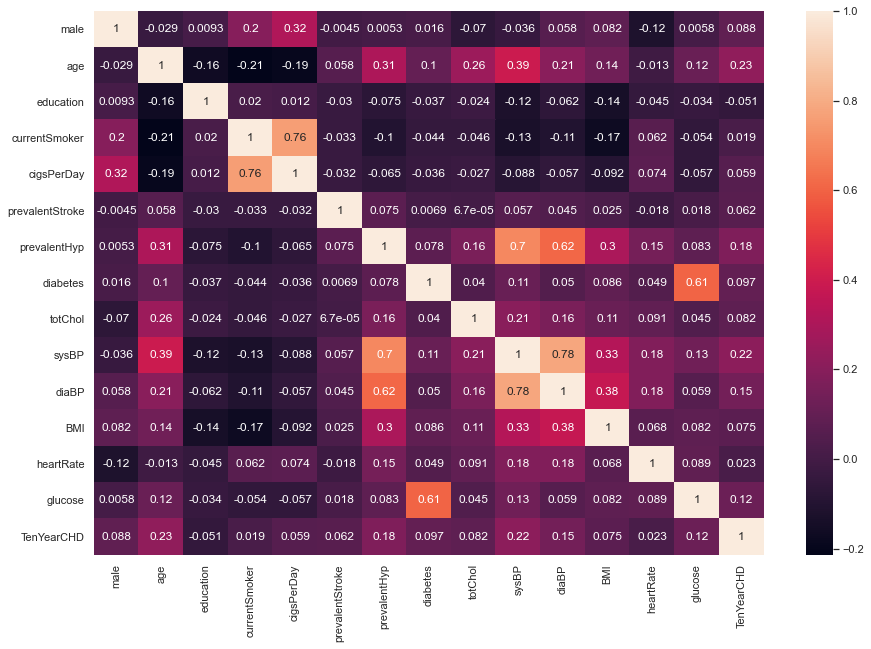

In [35]:
# heatmap displaying correlation Matrix 
sns.set(rc={'figure.figsize':(15,10)})
# show variables with correlation greater than 0.7. 
sns.heatmap(corrMatrix , annot=True)

#### From the correlation matrix plot, we find that variable "cigsPerDay" and "currentSmoker" have strong correlation. Variable "diaBP" and "sysBP” have strong correlation. Thus we will first conduct PCA for dimension reduction and then create interaction term if necessnary. 

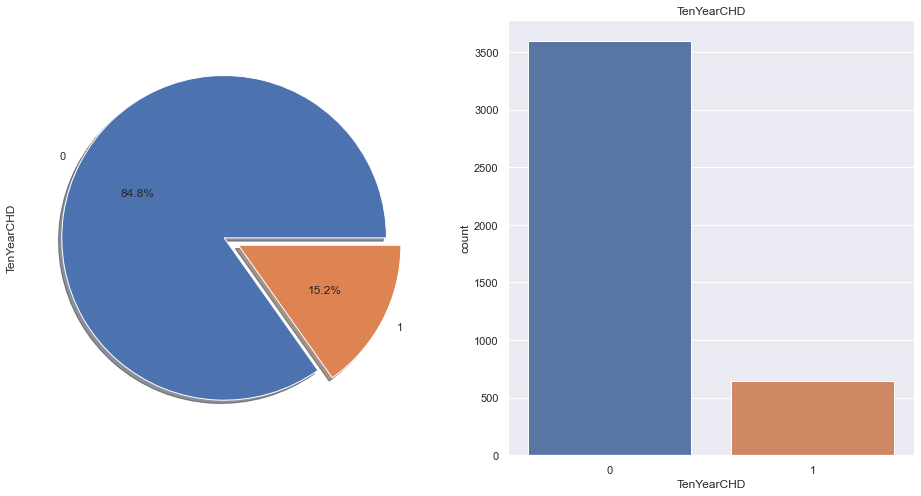

In [36]:
# percentages and counts of people who might develop heart disease vs people who might now develop heart disease
f,ax=plt.subplots(1,2,figsize=(16,8))
df['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('TenYearCHD',data=df,ax=ax[1])
ax[1].set_title('TenYearCHD')
plt.show()

In [37]:
# ratio of 0.0 to 1.0 in TenYearCHD column
df.TenYearCHD.value_counts()[0]/df.TenYearCHD.value_counts()[1]

5.580745341614906

<AxesSubplot:xlabel='TenYearCHD', ylabel='Density'>

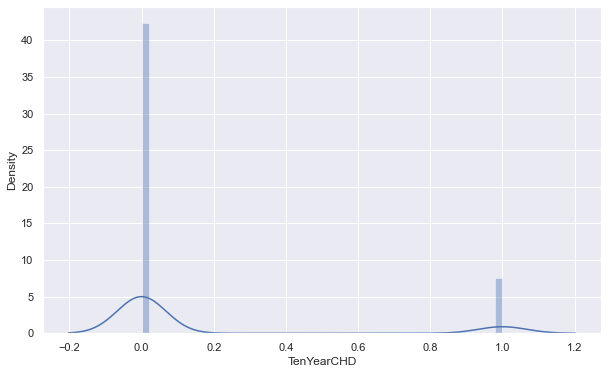

In [38]:
# density plot of TenYearCHD
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['TenYearCHD'])

#### The density plot shows that the target variable "TenYearCHD" has an uneven distribution of observations. Class 0 has a very high number of observations and Class 1 has a very low number of observations. To deal with the imbalanced data, we will use SMOTE oversampling technique to generate random samples from minority class.

# Feature Engineering 

### 1. SMOTE for data balancing 

In [39]:
# Split into two datasets, one with predictors, one with response
X, y = df.drop(['TenYearCHD'], axis = 1), df['TenYearCHD']

In [40]:
# change y to data frame
y = pd.DataFrame(y)

In [41]:
# SMOTE for data balancing
sm = SMOTE(random_state=12)
X, y = sm.fit_resample(X, y)

<AxesSubplot:xlabel='TenYearCHD', ylabel='Density'>

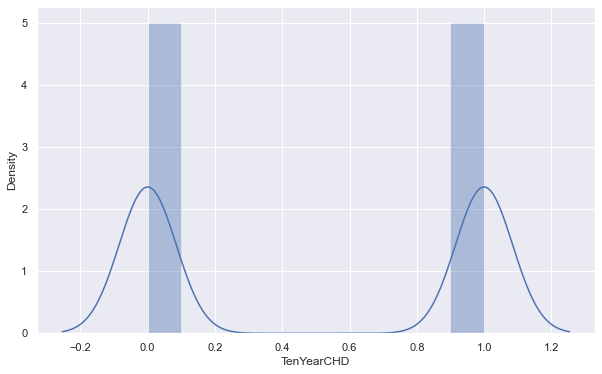

In [42]:
# density plot of TenYearCHD after balancing 
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(y['TenYearCHD'])

In [43]:
# ratio of 0.0 to 1.0 in TenYearCHD column
y.TenYearCHD.value_counts()[0]/y.TenYearCHD.value_counts()[1]

1.0

#### Now data is balanced

### 2. PCA

In [44]:
# standardize data 
stscaler = StandardScaler().fit(X)
scaled = stscaler.transform(X)

In [45]:
# we select only 10 componenets 
pca = PCA(n_components = 10)
pca.fit(X)

PCA(n_components=10)

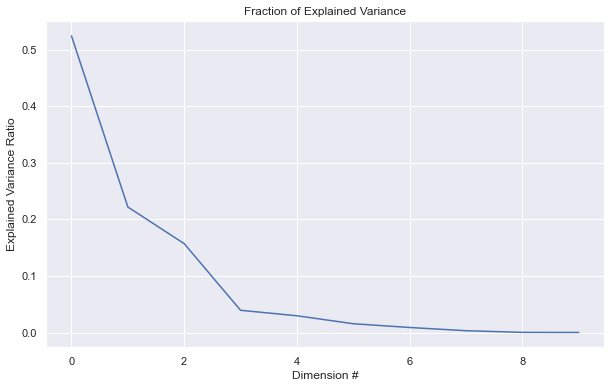

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('Dimension #')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('Fraction of Explained Variance')
ax.plot(pca.explained_variance_ratio_)

#### From the PCA variance plot, we find that the first three components can explain roughly 90% of response variable. Thus, we decide to use first three componenets (0,1,2).

In [47]:
# check relavance of variable in each PC component
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
pca.components_ = np.array(pca.components_).reshape(15,10)
Loadings = pd.DataFrame(pca.components_,columns=PCnames,index=X.columns)

# select first 3 components 
Loadings.iloc[:,:3]

,PC1,PC2,PC3
male,-0.001227,0.046000,0.000110
age,0.156243,0.065924,0.012129
education,0.000945,0.000033,0.004418
currentSmoker,0.000911,-0.097660,0.002543
cigsPerDay,-0.813442,-0.390630,-0.038504
BPMeds,-0.000597,-0.000145,-0.000684
prevalentStroke,-0.012074,0.032511,-0.000560
prevalentHyp,-0.097354,-0.018635,0.016315
diabetes,0.000411,0.000074,0.000365
totChol,-0.012432,-0.600116,0.001602


<AxesSubplot:>

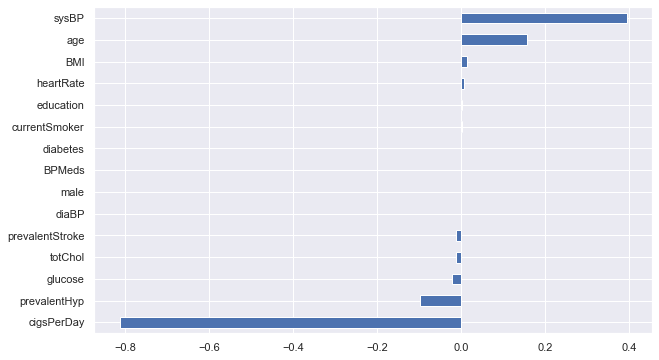

In [48]:
# pca 1 bar plot
Loadings["PC1"].sort_values().plot.barh()

<AxesSubplot:>

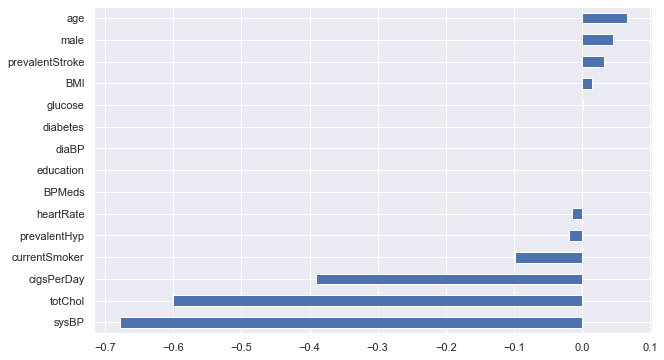

In [49]:
# pca 2 bar plot
Loadings["PC2"].sort_values().plot.barh()

<AxesSubplot:>

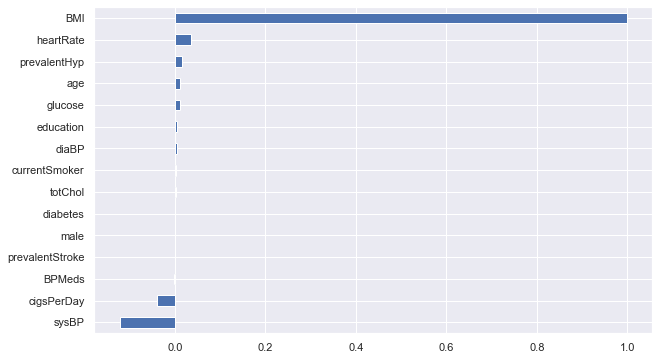

In [50]:
# pca 3 bar plot
Loadings["PC3"].sort_values().plot.barh()

In [51]:
# select important features
X_pca = X[["cigsPerDay","sysBP", "prevalentHyp", "age","glucose", "male", "totChol", "currentSmoker", "diaBP", "BMI","diabetes","prevalentStroke", "heartRate"]]

In [52]:
X_pca.head()

,cigsPerDay,sysBP,prevalentHyp,age,glucose,male,totChol,currentSmoker,diaBP,BMI,diabetes,prevalentStroke,heartRate
0,0.0,106.0,0,39,77.0,1,195.0,0,70.0,26.97,0,0,80.0
1,0.0,121.0,0,46,76.0,0,250.0,0,81.0,28.73,0,0,95.0
2,20.0,127.5,0,48,70.0,1,245.0,1,80.0,25.34,0,0,75.0
3,30.0,150.0,1,61,103.0,0,225.0,1,95.0,28.58,0,0,65.0
4,23.0,130.0,0,46,85.0,0,285.0,1,84.0,23.10,0,0,85.0


In [53]:
# correlation matrix for checking collinearity
corrMatrix = X_pca.corr()
corrMatrix

,cigsPerDay,sysBP,prevalentHyp,age,glucose,male,totChol,currentSmoker,diaBP,BMI,diabetes,prevalentStroke,heartRate
cigsPerDay,1.000000,-0.098441,-0.107112,-0.223234,-0.046108,0.340178,-0.035510,0.780705,-0.065950,-0.102739,-0.030577,-0.026722,0.097206
sysBP,-0.098441,1.000000,0.703309,0.409090,0.151098,-0.097901,0.193044,-0.181499,0.807020,0.308643,0.097177,0.028662,0.160202
prevalentHyp,-0.107112,0.703309,1.000000,0.319741,0.081059,-0.062598,0.147860,-0.155341,0.625155,0.271260,0.061465,0.052242,0.138507
age,-0.223234,0.409090,0.319741,1.000000,0.113750,-0.094776,0.209006,-0.281153,0.204131,0.138019,0.075675,0.033838,-0.010586
glucose,-0.046108,0.151098,0.081059,0.113750,1.000000,-0.034334,0.066881,-0.097321,0.056071,0.111808,0.750468,0.006471,0.088144
male,0.340178,-0.097901,-0.062598,-0.094776,-0.034334,1.000000,-0.106990,0.268934,0.003656,0.042364,-0.010066,0.003128,-0.096919
totChol,-0.035510,0.193044,0.147860,0.209006,0.066881,-0.106990,1.000000,-0.073857,0.154249,0.105671,0.036310,-0.004274,0.092251
currentSmoker,0.780705,-0.181499,-0.155341,-0.281153,-0.097321,0.268934,-0.073857,1.000000,-0.142374,-0.176003,-0.066729,-0.019843,0.074086
diaBP,-0.065950,0.807020,0.625155,0.204131,0.056071,0.003656,0.154249,-0.142374,1.000000,0.352252,0.027367,0.024750,0.166635
BMI,-0.102739,0.308643,0.271260,0.138019,0.111808,0.042364,0.105671,-0.176003,0.352252,1.000000,0.101251,0.016104,0.070704


<AxesSubplot:>

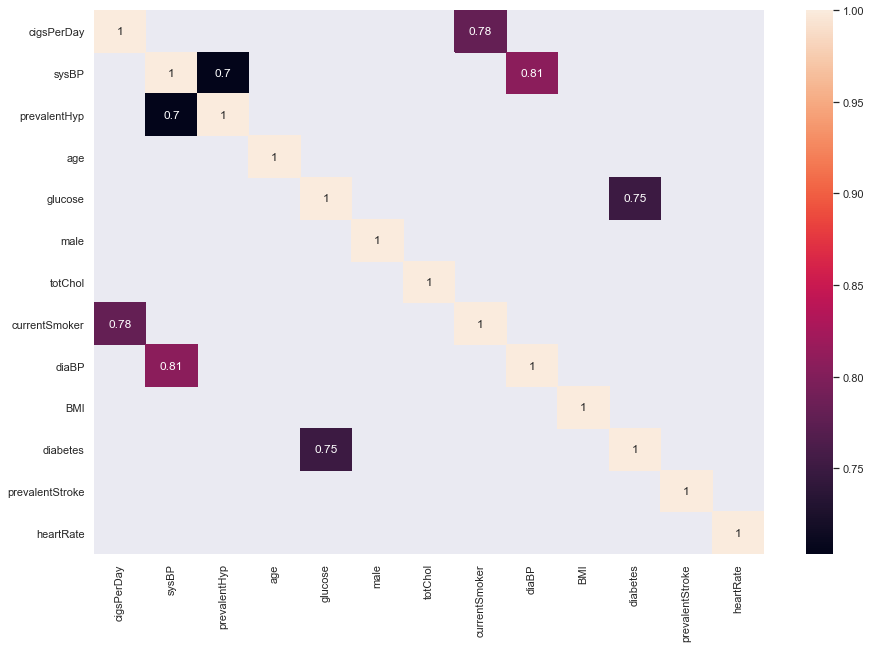

In [54]:
# heatmap displaying correlation Matrix 
sns.set(rc={'figure.figsize':(15,10)})
# show variables with correlation greater than 0.7. 
sns.heatmap(corrMatrix[corrMatrix >0.7] , annot=True)

### 3. Drop columns to reduce multicollinearity

In [55]:
# drop currentSmoker column
X_pca = X_pca.drop(['currentSmoker'], axis = 1)

In [56]:
# drop glucose column 
X_pca = X_pca.drop(['glucose'], axis = 1)

In [57]:
# drop diaBP
X_pca = X_pca.drop(['diaBP'], axis = 1)

In [58]:
# drop prevalentHyp
X_pca = X_pca.drop(['prevalentHyp'], axis = 1)

In [59]:
# rename dataset
X1 = X_pca

In [60]:
X1.head()

,cigsPerDay,sysBP,age,male,totChol,BMI,diabetes,prevalentStroke,heartRate
0,0.0,106.0,39,1,195.0,26.97,0,0,80.0
1,0.0,121.0,46,0,250.0,28.73,0,0,95.0
2,20.0,127.5,48,1,245.0,25.34,0,0,75.0
3,30.0,150.0,61,0,225.0,28.58,0,0,65.0
4,23.0,130.0,46,0,285.0,23.10,0,0,85.0


In [61]:
X1.shape

(7188, 9)

# Models

## Logistic Regression Model 

In [62]:
# Split data into train and test
train_X, test_X, train_y, test_y = train_test_split(X1, y, train_size = 0.8, test_size = 0.2, stratify=y, random_state=10)

In [63]:
# cross validation on training data 
model = LogisticRegression()
scores = cross_val_score(model, train_X, train_y, cv=10, scoring='accuracy')

In [64]:
# crosss validation accuracy 
np.mean(scores)

0.648

In [65]:
model.fit(train_X, train_y)
y_pred_logit = model.predict(test_X)

In [66]:
# predicted heart disease rate
model.fit(train_X, train_y)
y_pred_logit = model.predict(test_X)

In [67]:
# shape of predicted heart disease rate
y_pred_logit.shape

(1438,)

In [68]:
# compare actual stroke in test with predicted heart disease rate
accuracy_metric = accuracy_score(y_pred_logit, test_y)
accuracy_metric

0.6662030598052852

##### The cv accuracy and the test accuracy are roughly equal, but the accuary is low, which is only 64%. Thus, we believe the model is underfitting.  

### Confusion Matrix Plot

<Figure size 6400x4800 with 0 Axes>

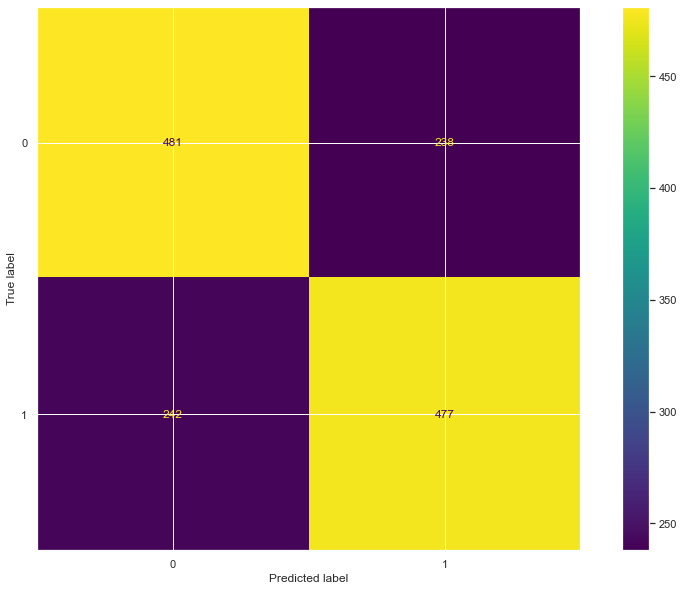

In [69]:
# confusion matrix 
figure(figsize=(80, 60), dpi=80)
plot_confusion_matrix(model, test_X, test_y) 
plt.show()

### ROC Curves for logistic regression

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.732


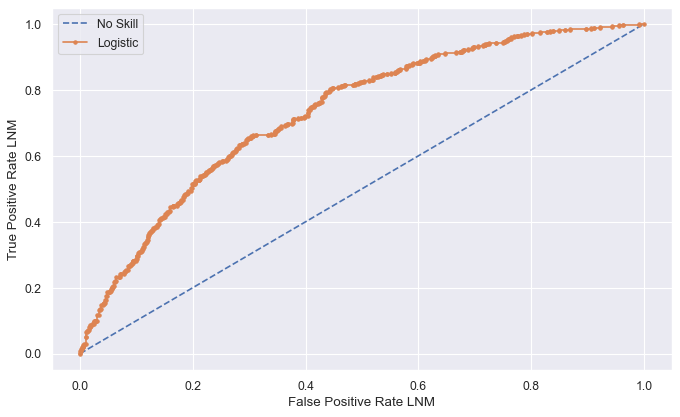

In [70]:
# roc curve and auc
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]
# fit a model
model.fit(train_X, train_y)
# predict probabilities
lr_probs = model.predict_proba(test_X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)


figure(figsize=(10, 6), dpi=80)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate LNM')
pyplot.ylabel('True Positive Rate LNM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance. In our plot, the curve is closer to the 45 degree line compared to left corner. Thus, our performance is not ideal. 

## Logistic regression model with Lasso Regularization
Since we find that there is multi-collinearity among variables, so we decide to apply lasso regularization to reduce impact of collinearity and overfitting. 

In [71]:
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(train_X, train_y)

LogisticRegression(penalty='l1', solver='liblinear')

In [72]:
# lasso coefficient 
log.coef_

array([[ 0.03391098,  0.01664264,  0.06871642, -0.42163837,  0.00125247,
         0.01686307,  0.14456478, -0.38137925, -0.00868968]])

In [73]:
# cross validation accuracy 
log.score(train_X, train_y)

0.6553043478260869

In [74]:
# predict on test dataset 
loglasso_pred = log.predict(test_X)

In [75]:
# shape of predicted heart disease rate
loglasso_pred.shape

(1438,)

In [76]:
# compare actual stroke in test with predicted heart disease rate using lasso regularization
accuracy_metric_lasso = accuracy_score(loglasso_pred, test_y)
accuracy_metric_lasso

0.6655076495132128

#### The cv accuracy and the test accuracy are roughly equal. However, logistic regression with lasso regularization performs better than single logistic regression, as it has higher model accuracy on test data.  But still, the prediction accuracy is only 67%, indicating an underfitting issue. 

### Confusion Matrix

<Figure size 6400x4800 with 0 Axes>

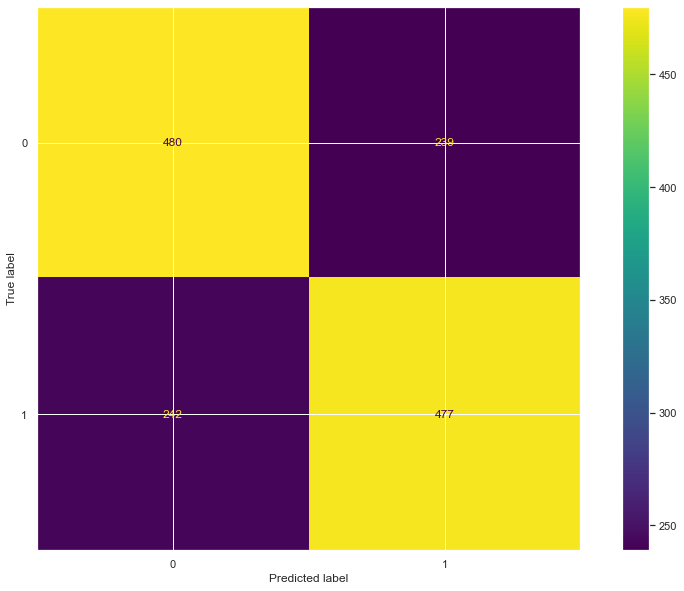

In [77]:
# confusion matrix 
figure(figsize=(80, 60), dpi=80)
plot_confusion_matrix(log, test_X, test_y) 
plt.show()

## ROC Curve for lasso regression

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.728


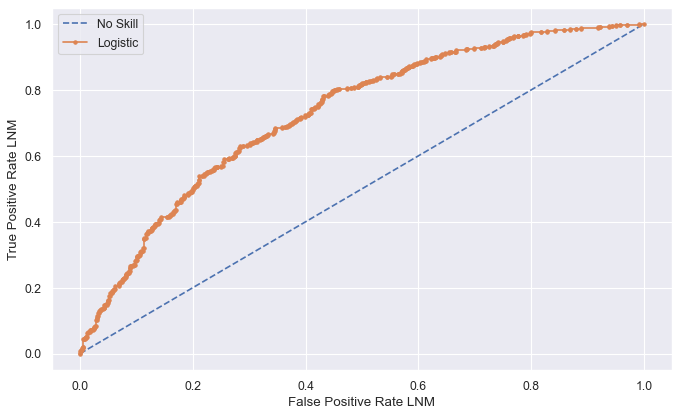

In [78]:
# roc curve and auc
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(test_y))]
# fit a model
log.fit(train_X, train_y)
# predict probabilities
lr_probs = log.predict_proba(test_X)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(test_y, ns_probs)
lr_auc = roc_auc_score(test_y, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)


figure(figsize=(10, 6), dpi=80)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate LNM')
pyplot.ylabel('True Positive Rate LNM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### The ROC lasso logistic plot shows a better prediction outcome than ROC Logistic plot, as the curve is less closer to the 45 degree angle. 

## Decision Tree 
Since Decision Tree is not impacted by multicollinearity issue, so we apply pre-pca data to train model.

In [79]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify=y, random_state=10)

In [80]:
# cross validation on training data 
dtree = DecisionTreeClassifier()
dtree_scores_pca = cross_val_score(dtree, train_X, train_y, cv=10, scoring='accuracy')
# crosss validation accuracy 
np.mean(dtree_scores_pca)

0.8128695652173914

In [81]:
# compute prediction accuracy
d_fit = dtree.fit(train_X, train_y)
y_pred = dtree.predict(test_X)
accuracy_metric = accuracy_score(y_pred, test_y)
accuracy_metric

0.8178025034770514

#### Since prediction accuracy and cv accuacy are similar, the model has no overfitting issue.

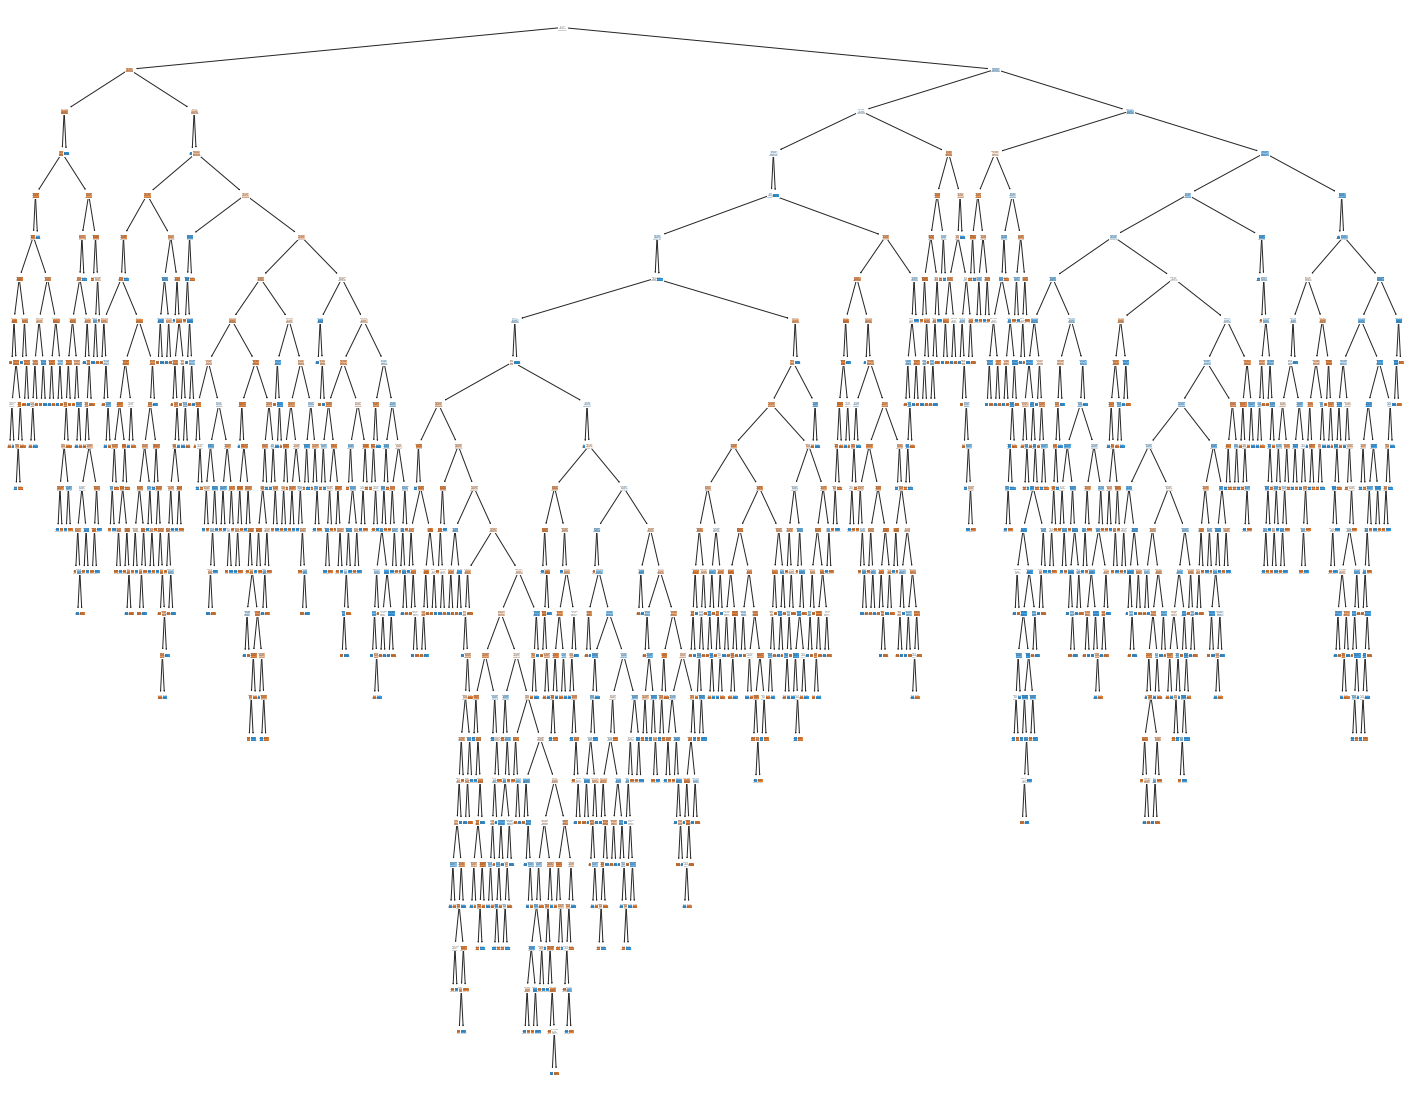

In [82]:
# tree plot
fig = plt.figure(figsize=(25,20))
plot_tree(dtree.fit(train_X, train_y), filled=True)
plt.show()

## Random Forest 
Since Random Forest is not impacted by multicollinearity issue, so we apply pre-pca data to train model.

In [83]:
# cross validation on pre-PCA training data 
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, train_X, train_y, cv=10, scoring='accuracy')
# crosss validation accuracy 
np.mean(rf_scores)

0.9029565217391304

In [84]:
# comput prediction accuracy
rf.fit(train_X, train_y)
y_pred = rf.predict(test_X)
accuracy_metric = accuracy_score(y_pred, test_y)
accuracy_metric

0.9061196105702365

#### Since prediction accuracy and cv accuacy are similar, the model has no overfitting issue.

Text(0.5, 0.98, 'Important Variables From Random Forest')

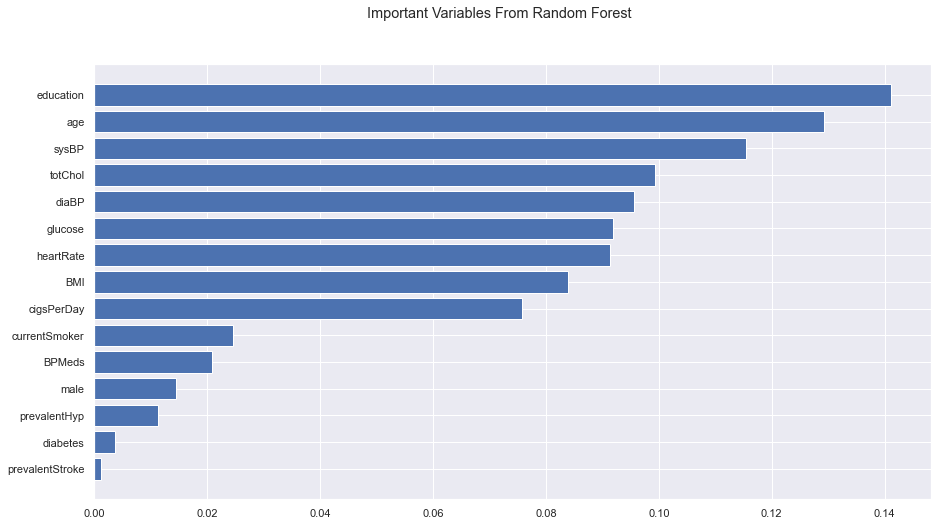

In [85]:
# Top 20 most important features of this model
sorted_idx = rf.feature_importances_.argsort()[-20:]
plt.figure(figsize=(15,8))
plt.barh(train_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.suptitle('Important Variables From Random Forest')

## GRNN
Since GRNN is not impacted by multicollinearity issue, so we apply pre-pca data to train model.

In [86]:
grnn = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_grnn = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.2, 0.4, 0.01)),
                'calibration' : ['None']
                 }
grid_grnn = GridSearchCV(estimator=grnn,
                          param_grid=params_grnn,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1,
                          n_jobs = -1
                          )
grid_grnn.fit(train_X, train_y.values.ravel())
# Use the best model to perform prediction, and compute mse
best_model = grid_grnn.best_estimator_
y_pred = best_model.predict(test_X)
y_pred = list(map(lambda x: 1 if x >0.5 else 0 ,y_pred))
accuracy_metric = accuracy_score(y_pred, test_y)
accuracy_metric

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9228094575799722

In [87]:
grid_grnn.best_params_

{'calibration': 'None', 'kernel': 'RBF', 'sigma': 0.2700000000000001}

In [88]:
best_model

GRNN(calibration='None', sigma=0.2700000000000001)

##### The model accuracy at sigma = 0.3 is the highest at 91.7%

In [89]:
ypred = cross_val_predict(best_model, X, y, cv=6)
ypred

array([0., 0., 1., ..., 1., 1., 1.])

In [90]:
y_pred = list(map(lambda x: 1 if x >0.5 else 0 ,ypred))


In [91]:
accuracy_metric = accuracy_score(y_pred, y)
accuracy_metric

0.9175013912075681

Does not seem it is overfitting as cross-validation accuracy score is also around 92%. 